<a href="https://colab.research.google.com/github/sobiahashmi/Fundamentals-of-Python/blob/main/01_ANN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step-01 Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras


## Step-02 Load Dataset and Data Preprocessing

In [2]:
df = pd.read_csv("/content/drive/MyDrive/BIA class/Deep Learning/ANN/mnist.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
# value counts
df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [6]:
# unique values in our Target/Label
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [8]:
# Total number of unique values
df['label'].nunique()

10

* **split the dataset into features (pixels) and labels (target)**

In [6]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
features = df.drop("label", axis=1)
labels = df['label']

* **(I) Normalize pixel values to be in the range [0,1]**

In [15]:
features = features / 255.0
features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* **(II) convert into numpy array**

In [16]:
features = np.array(features)
labels = np.array(labels)

* **(III) reshape**

In [17]:
# reshape the features to match the expected input shape
features = features.reshape(-1,28,28)

In [18]:
features.shape

(42000, 28, 28)

In [19]:
# reshape the label to one dimentional
labels = labels.reshape(-1)

In [20]:
labels.shape

(42000,)

## Step-03 Build the ANN model

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.2), # 20 percent neutrons will be OFF
    keras.layers.Dense(10,activation = 'softmax')

])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Step-04 Compile the Model

In [22]:
# compile the model
model.compile(optimizer = 'adam', # backpropagation
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

## Step-05 Train the model

In [23]:
model.fit(features,labels,epochs = 5) # You can adjust the number of epochs

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8420 - loss: 0.5425
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9483 - loss: 0.1716
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1269
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9706 - loss: 0.0984
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9779 - loss: 0.0767


## Step-6 Save the model

In [26]:
model.save(filepath="/content/drive/MyDrive/BIA class/Deep Learning/ANN/latest_ann.keras")

In [27]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/BIA class/Deep Learning/ANN/latest_ann.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Step-7 Make Prediction

In [24]:
predictions = model.predict(features)
# use the same dataset for prediction (not recommended for real world use)


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


## Step-8 Visualize the results

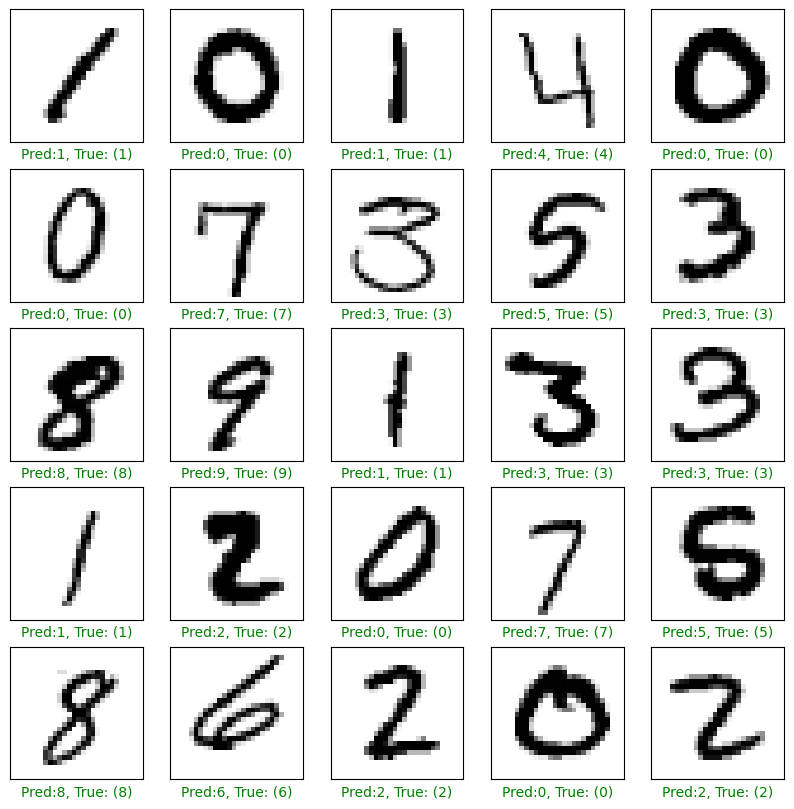

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(features[i],cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel(f"Pred:{predicted_label}, True: ({true_label})",color=color)
plt.show()



In [23]:
range(25)

range(0, 25)

## Save Model